**_<div style="text-align: center"> Ahmed Gurbuz | SMU Data Science Bootcamp </div>_**

# WeatherPy
----

#### This Python script visualizes the weather of randomly selected 500+ cities across the world of varying distance from the equator and builds a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
from pprint import pprint

# Import API key
from config import openweatherkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generating Cities List

In [41]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Performing API Calls
* Performing a weather check on each city using a series of successive API calls.
* Including a print log of each city as it'sbeing processed (with the city number and city name).



In [42]:
# Create a settings dictionary with your API key and preferred unit
params = {"units": "imperial", "appid": openweatherkey}

# Define base url derived from Open Weather API docs
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Create a for loop to see if query url built upon the base url works or not 
# Check first 10 cities API response objects
counter = 0
for city in cities:
    params['q'] = city
    if counter == 10:
        break
    response = requests.get(base_url, params = params)
    print(response)
    counter = counter + 1

<Response [200]>
<Response [200]>
<Response [200]>
<Response [404]>
<Response [200]>
<Response [200]>
<Response [404]>
<Response [200]>
<Response [200]>
<Response [200]>


In [30]:
#Create Data Frame for the features we will be analyzing for each city
data_df = pd.DataFrame(columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng', 'Max Temp', 'Wind Speed'])

In [31]:
#Create counters for the loop
set_count = 1
record_count = 1

#Create loop
#Gathering information from Openweather API for each city
for i, city in enumerate(cities): 
    params["q"] = city
    
    # Create conditional
    # Create a set for every 60 cities
    if (i % 60 == 0 and i > 50):
        set_count =+1
        record_count = 1
        # Giving a break to fetch data
        time.sleep(50)
    # Create try/except condition to catch and see that city information can be found or not from API call
    try:
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        # Create get request to achieve response object and convert it into JSON
        response = requests.get(base_url, params = params).json()
        # Filling Data Frame with information fetched from API (API docs)
        data_df.loc[i, "City"] = city
        data_df.loc[i, "Cloudiness"] = response['clouds']['all']
        data_df.loc[i, "Country"] = response['sys']['country']      
        data_df.loc[i, "Date"] = response['dt']       
        data_df.loc[i, "Humidity"] = response['main']['humidity']  
        data_df.loc[i, "Lat"] = response['coord']['lat']
        data_df.loc[i, "Lng"] = response['coord']['lon']
        data_df.loc[i, "Max Temp"] = response['main']['temp_max']
        data_df.loc[i, "Wind Speed"] = response['wind']['speed']              
    # Print 'City not found' if the API request gets no response
    except:
        print(f"City not found. Skipping...") 
    if i == 5:
        break
    record_count += 1
# Print out when data retrieval completed                 
print("Data retrieval finished")

Processing Record 1 of Set 1 | aklavik
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | zelenets
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | dakar
Data retrieval finished


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
# Export the city data into a csv file
data_csv = data_df.to_csv(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\data.csv", index = None, header=True)

In [37]:
# Display the Data Frame
data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,aklavik,75,CA,1569811507,52,68.22,-135.01,44.6,3.36
1,atuona,21,PF,1569811508,80,-9.8,-139.03,79.25,20.27
2,zelenets,98,RU,1569811513,74,53.83,48.02,42.53,15.37
3,carnarvon,75,ZA,1569811513,70,-30.97,22.13,43.79,19.08
5,dakar,40,SN,1569811397,88,14.69,-17.45,78.8,1.12


In [43]:
# Ignoring the rows that include missing data 
data_df.dropna(inplace= True)

# Converting unix date format into readable version
data_df['Date'] = pd.to_datetime(data_df['Date'],unit='s')

# Display cleaned Data Frame
data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,aklavik,75,CA,2019-09-30 02:45:07,52,68.22,-135.01,44.6,3.36
1,atuona,21,PF,2019-09-30 02:45:08,80,-9.8,-139.03,79.25,20.27
2,zelenets,98,RU,2019-09-30 02:45:13,74,53.83,48.02,42.53,15.37
3,carnarvon,75,ZA,2019-09-30 02:45:13,70,-30.97,22.13,43.79,19.08
5,dakar,40,SN,2019-09-30 02:43:17,88,14.69,-17.45,78.8,1.12


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

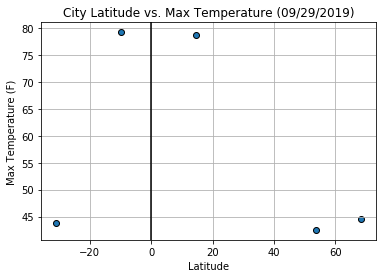

In [50]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Max Temp"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Max Temperature (09/29/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Plot grid
plt.grid(True)

#Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_max_temp.png")

# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

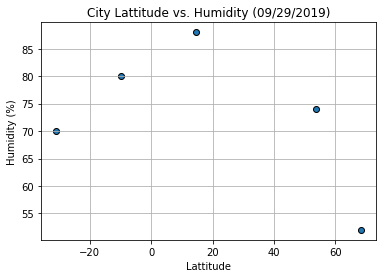

In [46]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Humidity"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Humidity (09/29/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Plot grid
plt.grid(True)

#Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_humidity.png")

# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

In [ ]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Cloudiness"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Cloudiness (09/29/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Plot grid
plt.grid(True)

#Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_cloudiness.png")

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Wind Speed"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Wind Speed (mph) (09/29/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Plot grid
plt.grid(True)

# Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_windspeed.png")

# Show the Figure
plt.show()